In [1]:
# Importing neccessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# DATA ASSIMILATION PROCESS

In [2]:
# Creating an array of the 5-day sample temperature data for the observations and the model.
observations = np.array([15.2,16.1,14.5,15.8,25.0]) 
model_data = np.array([14.8,15.5,14.0,16.0,25.3]) 

In [3]:
'''
The next step is to set the initial estimates for the state and the uncertainty of the state. 
Here I set the inital state estimate to be the first value of the model data out of our choosing
and I set the initial covariance estimate to be 1.
'''
# Initial estimates
initial_state_estimate = model_data[0]
initial_covariance_estimate = 1



'''
Both observation and model uncertainty is set to 1 and they correspond to the measurement_noise and the process_noise. 
What is happening here is that, probably something occurred during the collection of the observational data,
and since the uncertainty is unknown, we equate it to 1. The model data has same reason.
'''
# Process and measurement noise
process_noise = 1
measurement_noise = 1


'''
The next step is to create an empty array to store the state estimates alias, the assimalated data and the covariance estimates
alias the uncertainty for the assimilated data. I also checked for the number of observations.
'''
# Number of measurements
num_measurements = len(observations)
# Arrays to store the results
filtered_state_estimates = np.zeros(num_measurements)
filtered_covariance_estimates = np.zeros(num_measurements)

'''
In order to perform the data assimilation, I set the initial assimilsted data to the initial state estimate and the initial
uncertainty in the initial covariance estimate. This will allow us propagate and find the next assimalated data or the next best 
estimate.

'''
# Initial values
filtered_state_estimates[0] = initial_state_estimate
filtered_covariance_estimates[0] = initial_covariance_estimate

'''
The next step is to loop through the number of observations and update the state and covariance estimates 
and also calculate the kalman gain for each step. The steps here are 1 to 5

Predicted State Estimate 
The predicted state estimate is a forecast of the state variable before incorporating the new observation at time step 𝑘
It is based on the previous state estimate and the system's model, and it provides a means to anticipate the state of the system using all the information available up to the previous time step.

Significance: The predicted state estimate represents the expected state of the system before considering the new measurement. It is crucial for understanding how the system evolves over time based on the internal dynamics or model.

Predicted Covariance Estimate 
The predicted covariance estimate quantifies the uncertainty or confidence in the predicted state estimate. It combines the previous uncertainty with the process noise to reflect the increasing uncertainty over time due to the inherent variability in the system.

Significance: The predicted covariance estimate provides a measure of how much uncertainty there is in the predicted state. A larger predicted covariance implies greater uncertainty, while a smaller one implies more confidence in the prediction. This estimate is critical for determining the Kalman gain, which balances the reliance on the predicted state versus the new observation during the update step.


'''


for k in range(1, num_measurements):
    # Prediction step
    predicted_state_estimate = filtered_state_estimates[k-1]
    predicted_covariance_estimate = filtered_covariance_estimates[k-1] + process_noise

    # Update step
    kalman_gain = predicted_covariance_estimate / (predicted_covariance_estimate + measurement_noise)
    filtered_state_estimates[k] = predicted_state_estimate + kalman_gain * (observations[k] - predicted_state_estimate)
    filtered_covariance_estimates[k] = (1 - kalman_gain) * predicted_covariance_estimate
    

# Printing the results
print("Observations: ", observations)
print("Model data", model_data)
print("Filtered state estimates:", filtered_state_estimates)

'''

Assimilated Data: The filtered_state_estimates[k] represents the best estimate of the state at time 𝑘
k after assimilating both the model prediction and the observational data. It leverages the strength of both sources: the temporal consistency of the model and the accuracy of the observations.
Reduced Uncertainty: Through the Kalman gain, the filter adjusts the influence of the prediction and the observation based on their uncertainties. If the model prediction is more certain (lower predicted covariance), it will have more influence. Conversely, if the observation is more certain (lower measurement noise), it will have more influence.
Continuous Adjustment: At each time step, the filter continuously refines its state estimate, ensuring that the assimilated data reflects both the latest observation and the underlying model dynamics.

'''


Observations:  [15.2 16.1 14.5 15.8 25. ]
Model data [14.8 15.5 14.  16.  25.3]
Filtered state estimates: [14.8        15.66666667 14.9375     15.47142857 21.36181818]


'\n\nAssimilated Data: The filtered_state_estimates[k] represents the best estimate of the state at time 𝑘\nk after assimilating both the model prediction and the observational data. It leverages the strength of both sources: the temporal consistency of the model and the accuracy of the observations.\nReduced Uncertainty: Through the Kalman gain, the filter adjusts the influence of the prediction and the observation based on their uncertainties. If the model prediction is more certain (lower predicted covariance), it will have more influence. Conversely, if the observation is more certain (lower measurement noise), it will have more influence.\nContinuous Adjustment: At each time step, the filter continuously refines its state estimate, ensuring that the assimilated data reflects both the latest observation and the underlying model dynamics.\n\n'

# ANALYSIS AND COMPARISONS

In [4]:
'''
Make a dataframe out of the observational data, model data and the Assimilated (Filtered States Estimates).
'''

data = {
    "Model Data": model_data,
    "Observations": observations,
    "Assimilated Data": filtered_state_estimates
}
df = pd.DataFrame(data)
df

,Model Data,Observations,Assimilated Data
0,14.8,15.2,14.800000
1,15.5,16.1,15.666667
2,14.0,14.5,14.937500
3,16.0,15.8,15.471429
4,25.3,25.0,21.361818


In [5]:
'''
The next step is to calculate the root mean square error and the bias for the data. 
These are statistical metrics that helps us to see the performance of the assimilated data.
'''

RMSE_o = mean_squared_error(df['Observations'], df['Assimilated Data'],squared=False)
MBE_o = np.mean(df['Assimilated Data'] - df['Observations'])

RMSE_m = mean_squared_error(df['Model Data'], df['Assimilated Data'],squared=False)
MBE_m = np.mean(df['Assimilated Data'] - df['Model Data'])

C:\Users\DELL\AppData\Local\Temp\ipykernel_11052\48502978.py:32: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  sns.heatmap(df1.pivot("Observed", "Assimilated", values="Values"),annot=True,annot_kws={'fontsize':15}, ax=ax1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_11052\48502978.py:33: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  sns.heatmap(df2.pivot("Modelled", "Assimilated", values="Values"),annot=True,annot_kws={'fontsize':15}, ax=ax2)


Text(906.8986928104574, 0.5, 'Model')

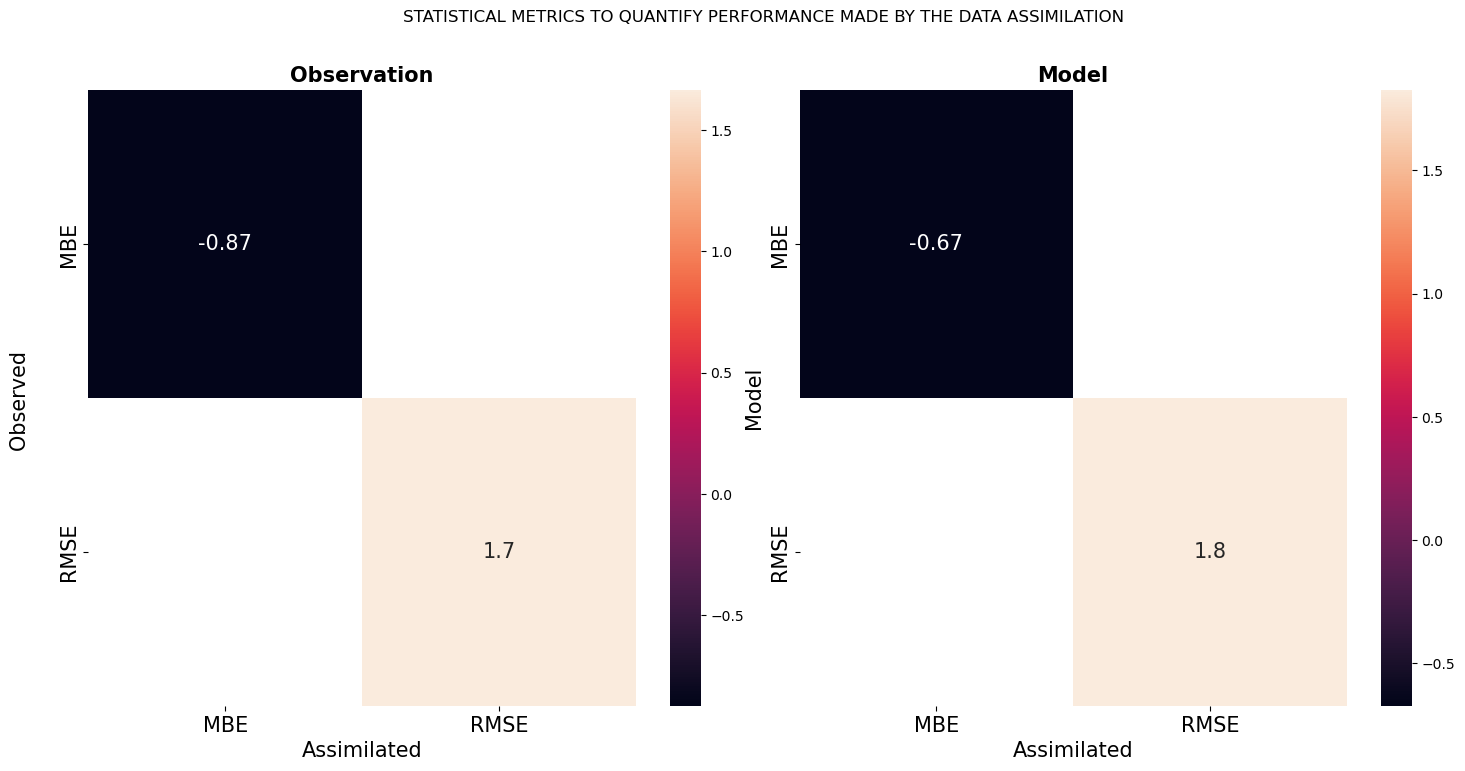

In [6]:
'''
The final step is to make a visualization of the statistical metrics
'''


Observations_data = {
    "Observed":["RMSE", "MBE"],
    "Assimilated": ["RMSE", "MBE"],
    "Values": [RMSE_o, MBE_o]
}

Modelled_data = {
    "Modelled":["RMSE", "MBE"],
    "Assimilated": ["RMSE", "MBE"],
    "Values": [RMSE_m, MBE_m]
}


df1 = pd.DataFrame(Observations_data)
df2 = pd.DataFrame(Modelled_data)

'''
we created a subplot and added two axes on it that is axis 1 and axis 2.
And finally, made a heatmap of the the Assimilated data against the observational data and 
the model data

'''

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,8))
fig.subplots_adjust(wspace=0.04)

sns.heatmap(df1.pivot("Observed", "Assimilated", values="Values"),annot=True,annot_kws={'fontsize':15}, ax=ax1)
sns.heatmap(df2.pivot("Modelled", "Assimilated", values="Values"),annot=True,annot_kws={'fontsize':15}, ax=ax2)


fig.suptitle("STATISTICAL METRICS TO QUANTIFY PERFORMANCE MADE BY THE DATA ASSIMILATION") # This is the overall  title of the subplot

# Configuring the title and labels for the first axis.
ax1.set_title("Observation", fontweight ="bold", fontsize=15)
ax1.tick_params(axis='both',labelsize=15)
ax1.set_xlabel('Assimilated', fontsize=15)
ax1.set_ylabel('Observed \n', fontsize=15)

# Configuring the title and the labels for the second axis.
ax2.set_title("Model", fontweight ="bold", fontsize=15)
ax2.tick_params(axis='both',labelsize=15)
ax2.set_xlabel('Assimilated', fontsize=15)
ax2.set_ylabel('Model', fontsize=15)